This is just demo to deep learning examples it's not fully optimized model.

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
df = pd.read_csv('./Data/Churn_Modelling.csv')
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
8425,8426,15642636,Glossop,755,France,Male,29,9,117035.89,1,1,1,21862.19,0
6474,6475,15626143,Talbot,695,France,Male,37,2,0.00,2,1,1,99692.65,0
2613,2614,15665221,Nwebube,630,France,Male,26,7,129837.72,2,0,1,197001.15,0
9383,9384,15739997,Capon,716,France,Female,23,2,94464.81,2,0,1,185900.88,0
4691,4692,15758050,Madukwe,622,Spain,Male,37,4,0.00,2,1,0,4459.50,0


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [49]:
df.drop(['RowNumber','CustomerId','Surname'],inplace=True,axis=1)

In [50]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  int64  
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Geography_Germany  10000 non-null  bool   
 10  Geography_Spain    10000 non-null  bool   
 11  Gender_Male        10000 non-null  bool   
dtypes: bool(3), float64(2), int64(7)
memory usage: 732.5 KB


In [52]:
df[['Geography_Germany','Geography_Spain','Gender_Male']] = df[['Geography_Germany','Geography_Spain','Gender_Male']].map(lambda x: 1 if x==True else 0)

In [53]:
x = df.drop(columns='Exited')
y = df['Exited']

In [54]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8)

In [55]:
from sklearn.preprocessing import StandardScaler
ss_obj = StandardScaler()
x_train_scaled = ss_obj.fit_transform(x_train)
x_test_scaled = ss_obj.transform(x_test)

In [56]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [57]:
model = Sequential()

In [58]:
model.add(Dense(3,activation='sigmoid',input_dim=11))
model.add(Dense(1,activation='sigmoid'))

c:\Users\manuj\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [59]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 3)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40 (160.00 B)

 Trainable params: 40 (160.00 B)

 Non-trainable params: 0 (0.00 B)

In [60]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [61]:
history = model.fit(x_train_scaled,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4076 - loss: 0.8183 - val_accuracy: 0.6425 - val_loss: 0.6662
Epoch 2/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6671 - loss: 0.6406 - val_accuracy: 0.7300 - val_loss: 0.5627
Epoch 3/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7363 - loss: 0.5468 - val_accuracy: 0.7844 - val_loss: 0.5107
Epoch 4/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8038 - loss: 0.4894 - val_accuracy: 0.7987 - val_loss: 0.4833
Epoch 5/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8038 - loss: 0.4715 - val_accuracy: 0.8012 - val_loss: 0.4670
Epoch 6/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8001 - loss: 0.4613 - val_accuracy: 0.8012 - val_loss: 0.4560
Epoch 7/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7938 - loss: 0.4560 - val_accuracy: 0.8056 - val_loss: 0.4479
Epoch 8/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7990 - loss: 0.4463 - val_accuracy: 0.

In [62]:
model.layers[0].get_weights()

[array([[ 0.40360582,  0.33153155,  0.13218573],
        [ 0.40340635, -0.7762801 ,  1.3324996 ],
        [-0.07730689,  0.19968818,  0.29439312],
        [-0.15397514, -0.6362317 , -0.42827904],
        [-0.8393256 , -0.33444992, -0.6244708 ],
        [-0.12409212, -0.02061074,  0.09822348],
        [-0.6542988 ,  0.5041149 , -0.3743389 ],
        [-0.23809394, -0.0831565 ,  0.12830395],
        [ 0.4905126 , -0.5810448 ,  0.36629248],
        [-0.07261056, -0.25286794, -0.3244106 ],
        [-0.7227544 ,  0.20066866, -0.09952562]], dtype=float32),
 array([-0.575446 ,  0.7753733, -0.592268 ], dtype=float32)]

In [63]:
model.layers[1].get_weights()

[array([[ 0.6379007],
        [-2.0546126],
        [ 0.7049093]], dtype=float32),
 array([-0.6651569], dtype=float32)]

In [64]:
y_log = model.predict(x_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


In [65]:
y_pred = np.where(y_log>0.5,1,0)

In [66]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.806

In [68]:
history.history

{'accuracy': [0.4828124940395355,
  0.7020312547683716,
  0.75390625,
  0.7985937595367432,
  0.8004687428474426,
  0.8017187714576721,
  0.8021875023841858,
  0.8056250214576721,
  0.8092187643051147,
  0.8096874952316284],
 'loss': [0.7618705630302429,
  0.6074181795120239,
  0.5305543541908264,
  0.4916432201862335,
  0.47000858187675476,
  0.456323504447937,
  0.44672274589538574,
  0.43958988785743713,
  0.4342382550239563,
  0.4301542341709137],
 'val_accuracy': [0.6424999833106995,
  0.7300000190734863,
  0.784375011920929,
  0.7987499833106995,
  0.8012499809265137,
  0.8012499809265137,
  0.8056250214576721,
  0.8075000047683716,
  0.8075000047683716,
  0.809374988079071],
 'val_loss': [0.6662294864654541,
  0.5627461075782776,
  0.5106749534606934,
  0.4833047389984131,
  0.46703192591667175,
  0.45595765113830566,
  0.4479311406612396,
  0.4419037699699402,
  0.4374382793903351,
  0.43379461765289307]}

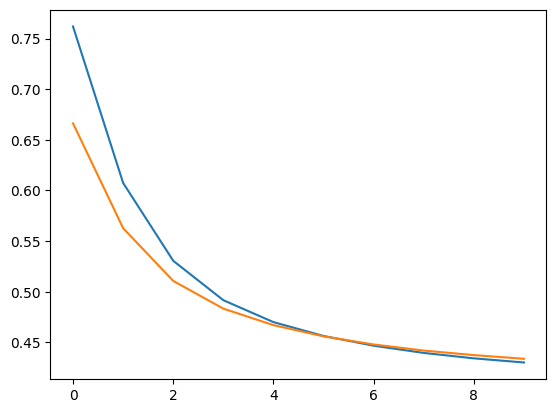

In [70]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

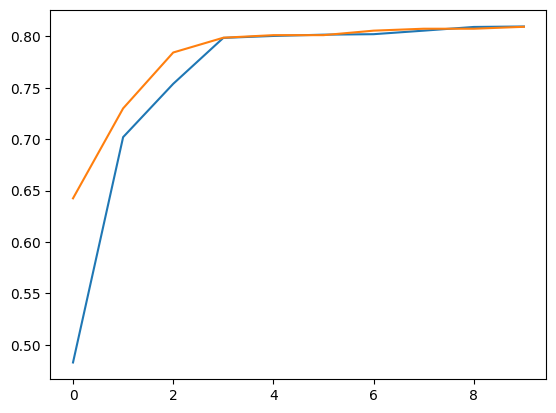

In [71]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])